In [20]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [35]:
from google.colab import files

# This will open a file dialog
uploaded = files.upload()


Saving Airbnb NYC 2019.csv to Airbnb NYC 2019 (2).csv


In [36]:
import pandas as pd

# Replace the filename with your uploaded file name
Airbnb_df = pd.read_csv('Airbnb NYC 2019.csv')

# Check the first few rows
Airbnb_df.head()


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [37]:
print(type(Airbnb_df))

<class 'pandas.core.frame.DataFrame'>


In [38]:
# Write your code to make your dataset analysis ready.
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}



In [39]:

# use a pandas function to rename the current function
Airbnb_df = Airbnb_df.rename(columns = rename_col)
Airbnb_df.head(2)

listing_id                        listing_name  host_id host_name  \
0        2539  Clean & quiet apt home by the park     2787      John   
1        2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  total_reviews last_review  reviews_per_month  \
0    149               1              9  2018-10-19               0.21   
1    225               1             45  2019-05-21               0.38   

   host_listings_count  availability_365  
0                    6               365  
1                    2               355

In [40]:
# Dataset Rows & Columns count
Airbnb_df.shape

(48895, 16)

In [41]:

# Dataset Info
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [42]:
# Dataset Duplicate Value Count
# check duplicate rows in dataset
Airbnb_df = Airbnb_df.drop_duplicates()
Airbnb_df.count()


listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

In [43]:
# Missing Values/Null Values Count
# checking null values of each columns
Airbnb_df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

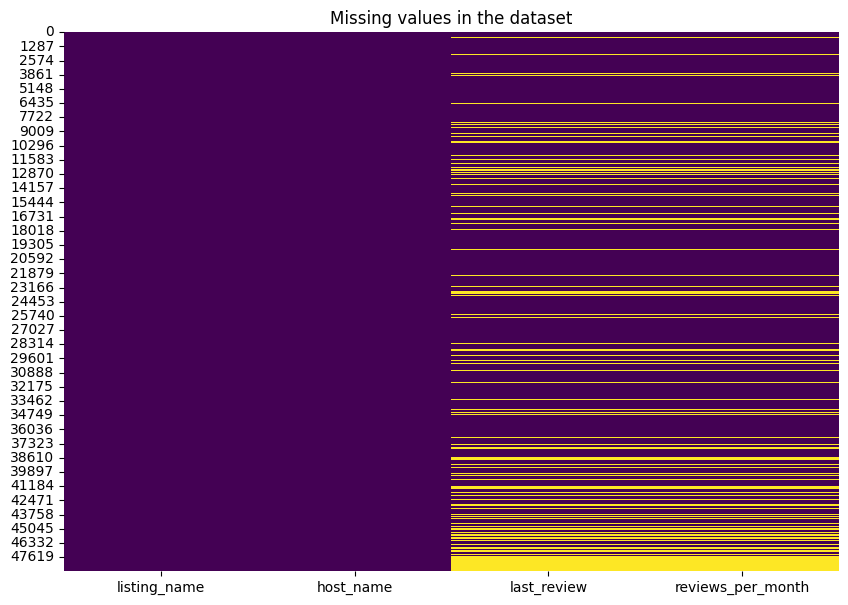

In [44]:
# Visualizing the missing values
missing_data = Airbnb_df[['listing_name', 'host_name', 'last_review', 'reviews_per_month']].isnull()

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()


In [45]:

# Dataset Columns
list(Airbnb_df.columns)


['listing_id',
 'listing_name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'total_reviews',
 'last_review',
 'reviews_per_month',
 'host_listings_count',
 'availability_365']

In [46]:
# Dataset Describe
Airbnb_df.describe().T

count          mean           std         min  \
listing_id           48895.0  1.901714e+07  1.098311e+07  2539.00000   
host_id              48895.0  6.762001e+07  7.861097e+07  2438.00000   
latitude             48895.0  4.072895e+01  5.453008e-02    40.49979   
longitude            48895.0 -7.395217e+01  4.615674e-02   -74.24442   
price                48895.0  1.527207e+02  2.401542e+02     0.00000   
minimum_nights       48895.0  7.029962e+00  2.051055e+01     1.00000   
total_reviews        48895.0  2.327447e+01  4.455058e+01     0.00000   
reviews_per_month    38843.0  1.373221e+00  1.680442e+00     0.01000   
host_listings_count  48895.0  7.143982e+00  3.295252e+01     1.00000   
availability_365     48895.0  1.127813e+02  1.316223e+02     0.00000   

                              25%           50%           75%           max  
listing_id           9.471945e+06  1.967728e+07  2.915218e+07  3.648724e+07  
host_id              7.822033e+06  3.079382e+07  1.074344e+08  2.743213e+08  
latitude             4.069010e+01  4.072307e+01  4.076311e+01  4.091306e+01  
longitude           -7.398307e+01 -7.395568e+01 -7.393627e+01 -7.371299e+01  
price                6.900000e+01  1.060000e+02  1.750000e+02  1.000000e+04  
minimum_nights       1.000000e+00  3.000000e+00  5.000000e+00  1.250000e+03  
total_reviews        1.000000e+00  5.000000e+00  2.400000e+01  6.290000e+02  
reviews_per_month    1.900000e-01  7.200000e-01  2.020000e+00  5.850000e+01  
host_listings_count  1.000000e+00  1.000000e+00  2.000000e+00  3.270000e+02  
availability_365     0.000000e+00  4.500000e+01  2.270000e+02  3.650000e+02

In [47]:
# Check Unique Values for each variable.
# check unique values for listing/property Ids
# all the listing ids are different and each listings are different here.
Airbnb_df['listing_id'].nunique()

48895

In [48]:

# so there are 221 unique neighborhood in Dataset
Airbnb_df['neighbourhood'].nunique()

221

In [49]:

#and total 5 unique neighborhood_group in Dataset
Airbnb_df['neighbourhood_group'].nunique()

5

In [50]:

# most of the listing/property are different in Dataset
Airbnb_df['listing_name'].nunique()

47905

In [51]:
Airbnb_df[Airbnb_df['host_name']=='David']['listing_name'].nunique()

# so here same host David operates different 402 listing/property

402

In [52]:
Airbnb_df[Airbnb_df['listing_name']==Airbnb_df['host_name']].head()

# there are few listings where the listing/property name and the host have same names

listing_id    listing_name    host_id       host_name  \
9473      7264659         Olivier    6994503         Olivier   
10682     8212051           Monty   43302952           Monty   
16422    13186374            Sean   35143476            Sean   
23996    19348168             Cyn   74033595             Cyn   
24152    19456810  Hillside Hotel  134184451  Hillside Hotel   

      neighbourhood_group       neighbourhood  latitude  longitude  \
9473            Manhattan     Upper West Side  40.78931  -73.97520   
10682            Brooklyn       East Flatbush  40.66383  -73.92706   
16422            Brooklyn     Windsor Terrace  40.65182  -73.98043   
23996            Brooklyn  Bedford-Stuyvesant  40.67850  -73.91478   
24152              Queens           Briarwood  40.70454  -73.81549   

             room_type  price  minimum_nights  total_reviews last_review  \
9473   Entire home/apt    200               5             12  2018-01-30   
10682      Shared room     95               2              7  2015-10-30   
16422  Entire home/apt    400               7              0         NaN   
23996     Private room     75               2              1  2018-09-10   
24152     Private room     93               1              2  2017-07-23   

       reviews_per_month  host_listings_count  availability_365  
9473                0.25                    1                25  
10682               0.15                    1               238  
16422                NaN                    1                 0  
23996               0.10                    1                 0  
24152               0.08                   18                90

In [53]:
Airbnb_df.loc[(Airbnb_df['neighbourhood_group']=='Queens') & (Airbnb_df['host_name']=='Alex')].head(4)

# Same host have hosted different listing/property in different or same neighbourhood in same neighbourhood groups
# like Alex hosted different listings in most of different neighbourhood and there are same also in queens neighbourhood_group!


listing_id                        listing_name   host_id host_name  \
3523      2104910  SPACIOUS APT BK/QUEENS w/BACKYARD!  10643810      Alex   
4512      3116519   Large 900 sqft Artist's Apartment   3008690      Alex   
6178      4518242              Zen MiniPalace Astoria  23424461      Alex   
10543     8090529         Modern studio in Queens, NY  17377835      Alex   

      neighbourhood_group neighbourhood  latitude  longitude        room_type  \
3523               Queens     Ridgewood  40.70988  -73.90845  Entire home/apt   
4512               Queens     Ridgewood  40.70124  -73.90941  Entire home/apt   
6178               Queens       Astoria  40.76369  -73.91601  Entire home/apt   
10543              Queens     Sunnyside  40.74674  -73.91881  Entire home/apt   

       price  minimum_nights  total_reviews last_review  reviews_per_month  \
3523      99               2             57  2017-03-08               0.89   
4512      70              10              0         NaN                NaN   
6178      80               1              3  2016-01-02               0.05   
10543    250               3              0         NaN                NaN   

       host_listings_count  availability_365  
3523                     1                42  
4512                     1                 0  
6178                     1                 0  
10543                    1               364

In [54]:
Airbnb_df['listing_name'].fillna('unknown',inplace=True)
Airbnb_df['host_name'].fillna('no_name',inplace=True)

/tmp/ipython-input-3316434738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Airbnb_df['listing_name'].fillna('unknown',inplace=True)
/tmp/ipython-input-3316434738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [55]:
#so the null values are removed
Airbnb_df[['host_name','listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

In [56]:
Airbnb_df = Airbnb_df.drop(['last_review'], axis=1)     #removing last_review column beacause of not that much important

In [57]:
# the null values are replaced by 0 value
Airbnb_df['reviews_per_month'] = Airbnb_df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [58]:
Airbnb_df['reviews_per_month'].isnull().sum()

np.int64(0)

In [59]:
#so now check Dataset columns changed and null values, last_review column removed.
Airbnb_df.sample(5)

listing_id                                       listing_name  \
24424    19670458   Economy Queen Bed in Caribbean Crown Heights 2SL   
367        105469                   Oceanfront Apartment in Rockaway   
31343    24355169  HUGE Modern Room/office/studio w Private Entrance   
41843    32531170                                   Eldridge Refined   
33235    26250832                           Sun lit Room in Bushwick   

        host_id host_name neighbourhood_group   neighbourhood  latitude  \
24424  17555570       Yan            Brooklyn   Crown Heights  40.66933   
367      547386  Michelle              Queens  Rockaway Beach  40.58615   
31343  43037915    Edward            Brooklyn   Crown Heights  40.66371   
41843  43811211       Jon           Manhattan       Chinatown  40.71612   
33235  48260592     Lizzy            Brooklyn        Bushwick  40.69922   

       longitude        room_type  price  minimum_nights  total_reviews  \
24424  -73.92162     Private room     51               1             83   
367    -73.81245     Private room     70              27             13   
31343  -73.95698     Private room    300               2              0   
41843  -73.99273  Entire home/apt    299               2              5   
33235  -73.93762     Private room     40               4              0   

       reviews_per_month  host_listings_count  availability_365  
24424                  3                   12                55  
367                    0                    1               335  
31343                  0                    1                 0  
41843                  2                    1               324  
33235                  0                    1                 0

In [60]:
# describe the DataFrame
Airbnb_df.describe()

listing_id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  total_reviews  reviews_per_month  host_listings_count  \
count    48895.000000   48895.000000       48895.000000         48895.000000   
mean         7.029962      23.274466           0.806258             7.143982   
std         20.510550      44.550582           1.502767            32.952519   
min          1.000000       0.000000           0.000000             1.000000   
25%          1.000000       1.000000           0.000000             1.000000   
50%          3.000000       5.000000           0.000000             1.000000   
75%          5.000000      24.000000           1.000000             2.000000   
max       1250.000000     629.000000          58.000000           327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

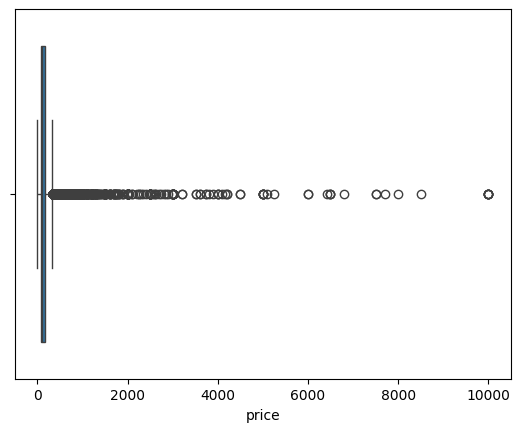

In [61]:
sns.boxplot(x = Airbnb_df['price'])

plt.show()

In [62]:
# writing a outlier function for removing outliers in important columns.
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range

In [65]:
# Assuming you already have a function iqr_technique that returns lower and upper bounds
lower_bound, upper_bound = iqr_technique(Airbnb_df['price'])

# Keep only rows within the IQR range
Airbnb_df = Airbnb_df[(Airbnb_df['price'] > lower_bound) & (Airbnb_df['price'] < upper_bound)]

# Check the cleaned data
Airbnb_df.shape
Airbnb_df['price'].describe()


count    20785.000000
mean       117.309550
std         68.108019
min         11.000000
25%         65.000000
50%         97.000000
75%        159.000000
max        339.000000
Name: price, dtype: float64

(20785, 15)


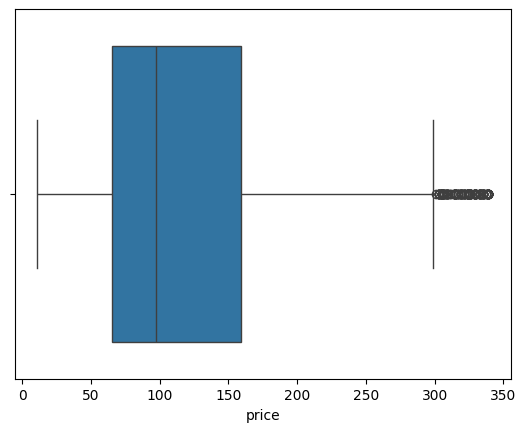

In [66]:
# so the outliers are removed from price column now check with boxplot and also check shape of new Dataframe!
sns.boxplot(x = Airbnb_df['price'])
print(Airbnb_df.shape)


In [67]:
# so here outliers are removed, see the new max price
print(Airbnb_df['price'].max())

339


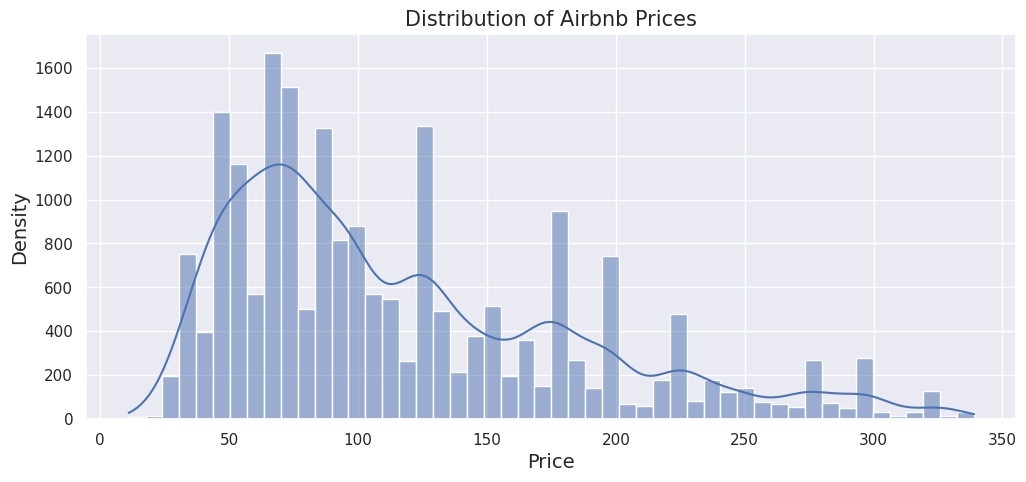

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart - 1 visualization
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')

# Create histogram using histplot (replacement for distplot)
sns.histplot(Airbnb_df['price'], kde=True, color='b', bins=50)

# Add labels and title
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Airbnb Prices', fontsize=15)
plt.show()


In [72]:
# Count the number of listings in each neighborhood group and store the result in a Pandas series
counts = Airbnb_df['neighbourhood_group'].value_counts()

# Reset the index of the series so that the neighborhood groups become columns in the resulting dataframe
Top_Neighborhood_group = counts.reset_index()

# Rename the columns of the dataframe to be more descriptive
Top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhood_group

Neighborhood_Groups  Listing_Counts
0           Manhattan            8781
1            Brooklyn            8709
2              Queens            2585
3               Bronx             525
4       Staten Island             185

/tmp/ipython-input-2076307745.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Airbnb_df['neighbourhood_group'],palette='Set1')


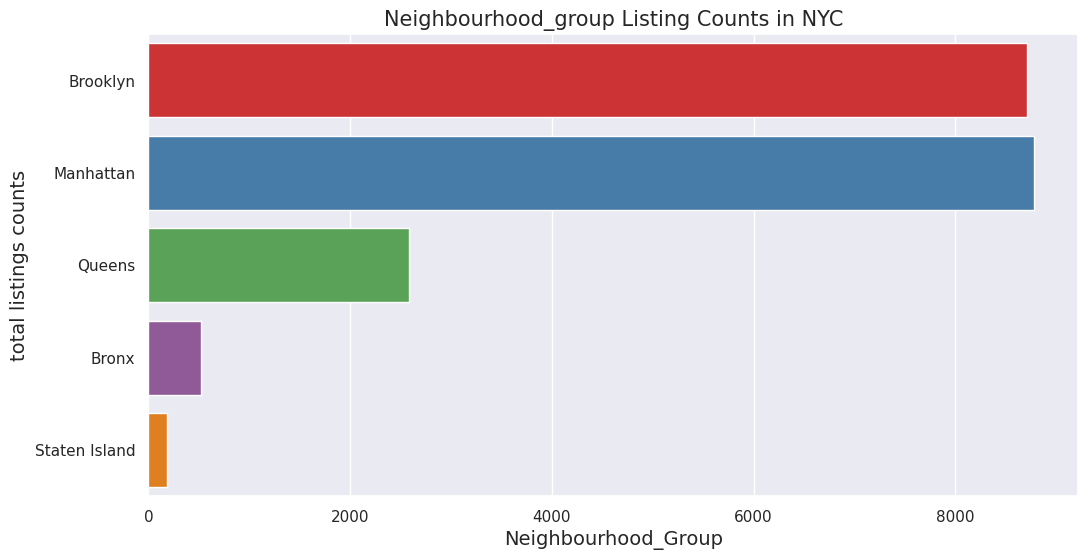

In [73]:
# Chart - 2 visualization code
# Set the figure size
plt.figure(figsize=(12, 6))

palette = sns.color_palette()

# Create a countplot of the neighbourhood group data
sns.countplot(Airbnb_df['neighbourhood_group'],palette='Set1')

# Set the x-axis label
plt.xlabel('Neighbourhood_Group', fontsize=14)

# Set the y-axis label
plt.ylabel('total listings counts', fontsize=14)

# Set the title of the plot
plt.title('Neighbourhood_group Listing Counts in NYC', fontsize=15)

plt.show()

In [75]:
# Group by neighbourhood_group and calculate mean only for 'price'
neighbourhood_group_avg_price = Airbnb_df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Round the prices to 2 decimals and rename column
neighbourhood_group_avg_price = neighbourhood_group_avg_price.rename(columns={'price': 'avg_price'})
neighbourhood_group_avg_price['avg_price'] = round(neighbourhood_group_avg_price['avg_price'], 2)

# Display the result
neighbourhood_group_avg_price

neighbourhood_group  avg_price
0               Bronx      76.12
1            Brooklyn     102.51
2           Manhattan     144.24
3              Queens      85.87
4       Staten Island      91.69

Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

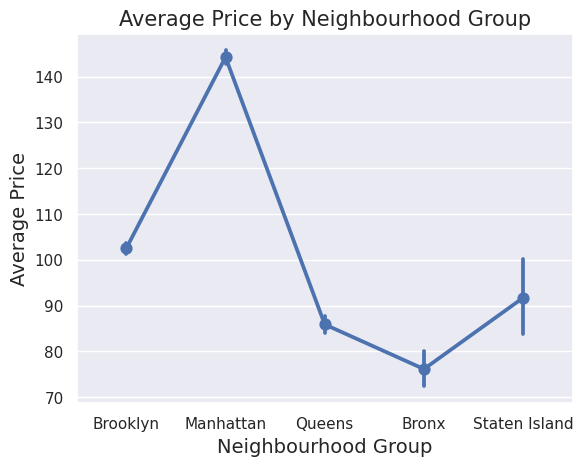

In [76]:
# Chart - 3 visualization code
#import mean function from the statistics module
from statistics import mean

# Create the point plot
sns.pointplot(x = 'neighbourhood_group', y='price', data=Airbnb_df, estimator = np.mean)

# Add axis labels and a title
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)

/tmp/ipython-input-1898378924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.violinplot(x='neighbourhood_group',y='price',data= Airbnb_df , palette='Set1')


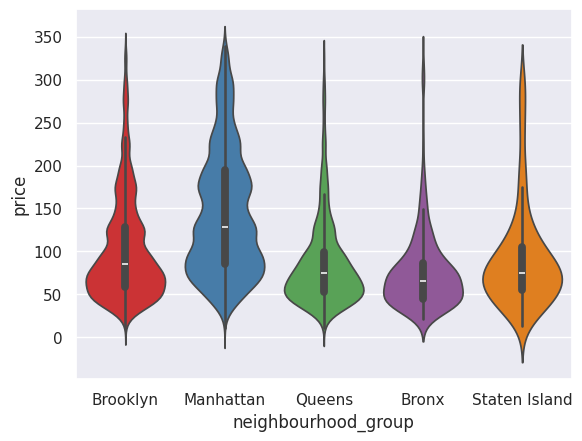

In [78]:
# Chart - 4 visualization code
# Create the violin plot for price distribution in each Neighbourhood_groups

ax= sns.violinplot(x='neighbourhood_group',y='price',data= Airbnb_df , palette='Set1')

In [79]:
# create a new DataFrame that displays the top 10 neighborhoods in the Airbnb NYC dataset based on the number of listings in each neighborhood
Top_Neighborhoods = Airbnb_df['neighbourhood'].value_counts()[:10].reset_index()

# rename the columns of the resulting DataFrame to 'Top_Neighborhoods' and 'Listing_Counts'
Top_Neighborhoods.columns = ['Top_Neighborhoods', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhoods

Top_Neighborhoods  Listing_Counts
0  Bedford-Stuyvesant            1658
1        Williamsburg            1551
2              Harlem            1221
3            Bushwick            1124
4      Hell's Kitchen             858
5     Upper East Side             765
6     Upper West Side             762
7        East Village             735
8       Crown Heights             657
9             Midtown             545

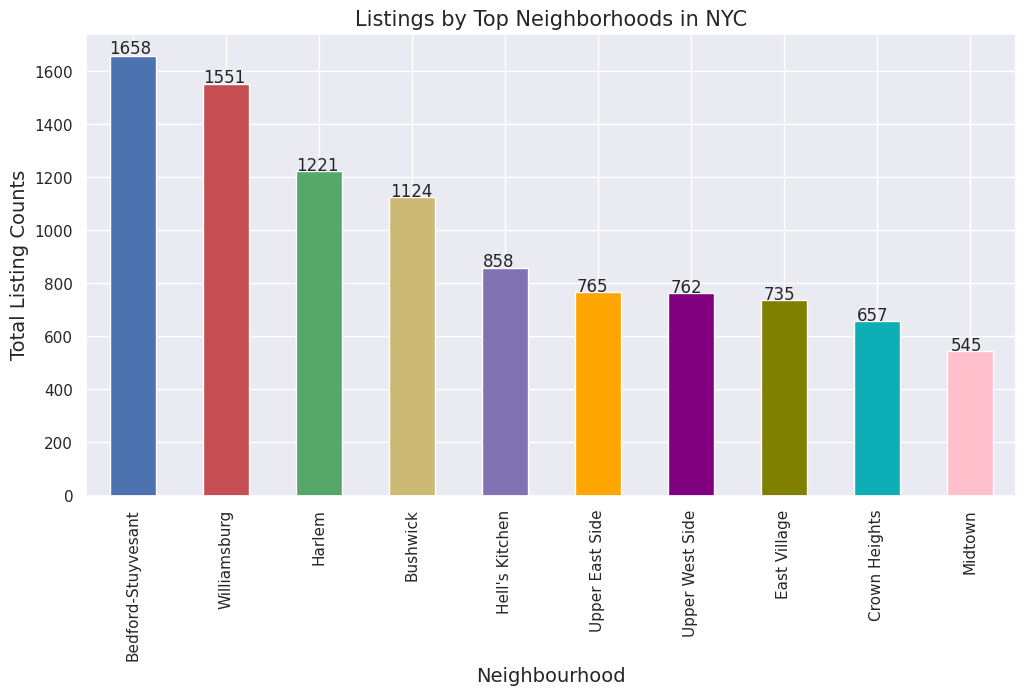

In [80]:
# Get the top 10 neighborhoods by listing count
top_10_neigbourhoods = Airbnb_df['neighbourhood'].value_counts().nlargest(10)
# Create a list of new colors to use for the bars
colors = ['b', 'r', 'g', 'y', 'm', '#FFA500', '#800080', '#808000', '#0DAEB6', '#FFC0CB']

# Create a bar plot of the top 10 neighborhoods using the new colors
ax = top_10_neigbourhoods.plot(kind='bar', figsize=(12, 6), color = colors)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listing Counts', fontsize=14)

# Set the title of the plot
plt.title('Listings by Top Neighborhoods in NYC', fontsize=15)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()

In [81]:
# create a new DataFrame that displays the top 10 hosts in the Airbnb NYC dataset based on the number of listings each host has
top_10_hosts = Airbnb_df['host_name'].value_counts()[:10].reset_index()

# rename the columns of the resulting DataFrame to 'host_name' and 'Total_listings'
top_10_hosts.columns = ['host_name', 'Total_listings']

# display the resulting DataFrame
top_10_hosts

host_name  Total_listings
0       Michael             195
1         David             173
2          John             136
3          Alex             126
4  Sonder (NYC)             116
5          Kara             100
6        Daniel              96
7    Blueground              95
8          Mike              94
9       Melissa              92

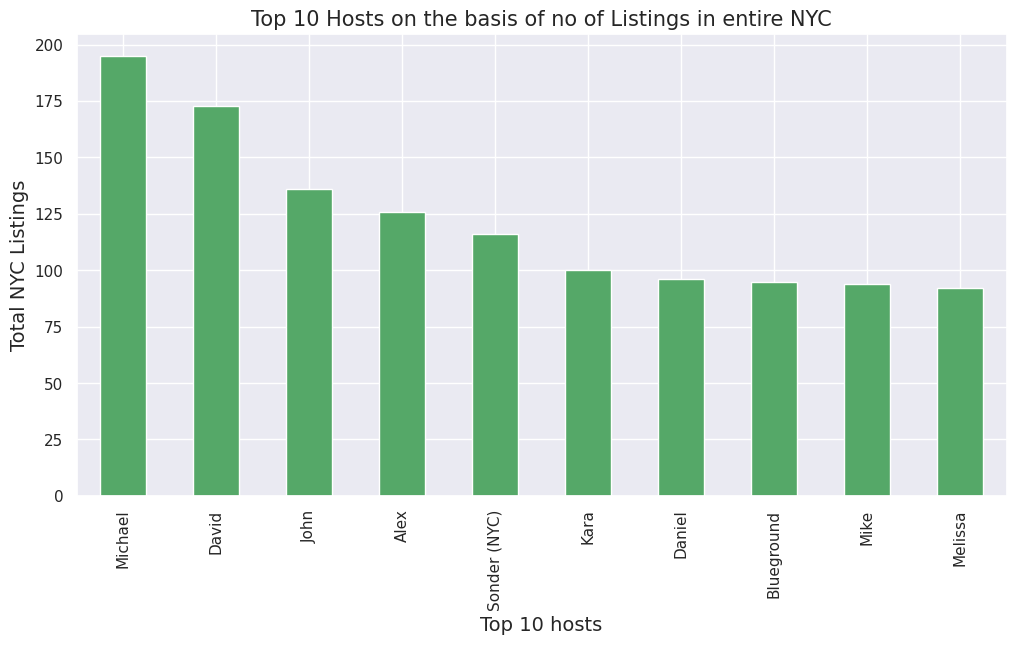

In [82]:
# Chart - 6 visualization code
# Get the top 10 hosts by listing count
top_hosts = Airbnb_df['host_name'].value_counts()[:10]

# Create a bar plot of the top 10 hosts
top_hosts.plot(kind='bar', color='g', figsize=(12, 6))

# Set the x-axis label
plt.xlabel('Top 10 hosts', fontsize=14)

# Set the y-axis label
plt.ylabel('Total NYC Listings', fontsize=14)

# Set the title of the plot
plt.title('Top 10 Hosts on the basis of no of Listings in entire NYC', fontsize=15)
plt.show()

In [83]:
# create a new DataFrame that displays the number of hosts in each neighborhood group in the Airbnb NYC dataset
hosts_per_location = Airbnb_df.groupby('neighbourhood_group')['listing_id'].count().reset_index()

# rename the columns of the resulting DataFrame to 'Neighbourhood_Groups' and 'Host_counts'
hosts_per_location.columns = ['Neighbourhood_Groups', 'Host_counts']

# display the resulting DataFrame
hosts_per_location

Neighbourhood_Groups  Host_counts
0                Bronx          525
1             Brooklyn         8709
2            Manhattan         8781
3               Queens         2585
4        Staten Island          185

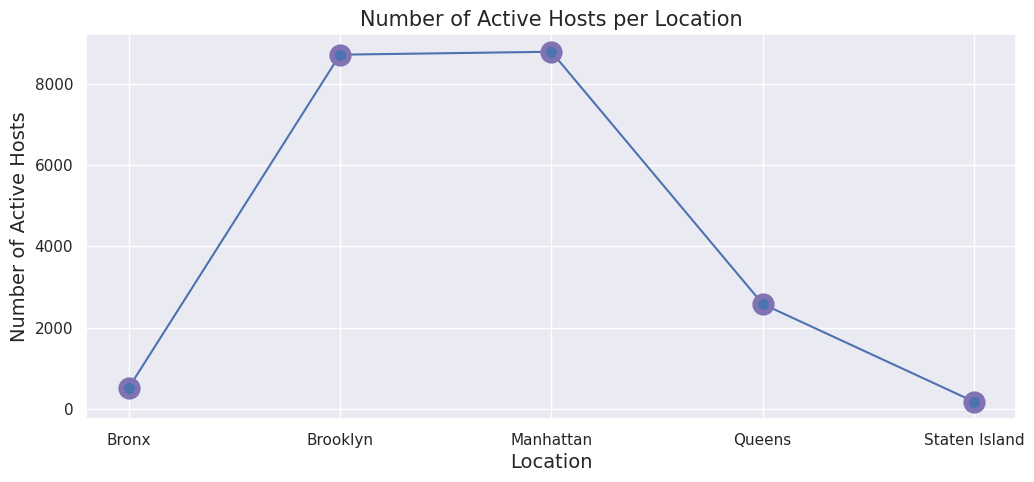

In [84]:
# Chart - 7 visualization code
# Group the data by neighbourhood_group and count the number of listings for each group
hosts_per_location = Airbnb_df.groupby('neighbourhood_group')['listing_id'].count()

# Get the list of neighbourhood_group names
locations = hosts_per_location.index

# Get the list of host counts for each neighbourhood_group
host_counts = hosts_per_location.values

# Set the figure size
plt.figure(figsize=(12, 5))

# Create the line chart with some experiments using marker function
plt.plot(locations, host_counts, marker='o', ms=12, mew=4, mec='m')

# Add a title and labels to the x-axis and y-axis
plt.title('Number of Active Hosts per Location', fontsize='15')
plt.xlabel('Location', fontsize='14')
plt.ylabel('Number of Active Hosts', fontsize='14')

# Show the plot
plt.show()

In [87]:
# Create a new DataFrame that displays the average price of Airbnb rentals in each neighborhood
neighbourhood_avg_price = Airbnb_df.groupby("neighbourhood")['price'].mean().reset_index().rename(columns={"price": "avg_price"})

# Select the top 10 neighborhoods with the lowest average prices
neighbourhood_avg_price = neighbourhood_avg_price.sort_values("avg_price").head(10)

# Join with 'neighbourhood_group' from the original DataFrame
neighbourhood_avg_price_sorted_with_group = neighbourhood_avg_price.merge(
    Airbnb_df[['neighbourhood', 'neighbourhood_group']].drop_duplicates(),
    on='neighbourhood',
    how='left'
)

# Display the resulting data without index
display(neighbourhood_avg_price_sorted_with_group.style.hide(axis='index'))



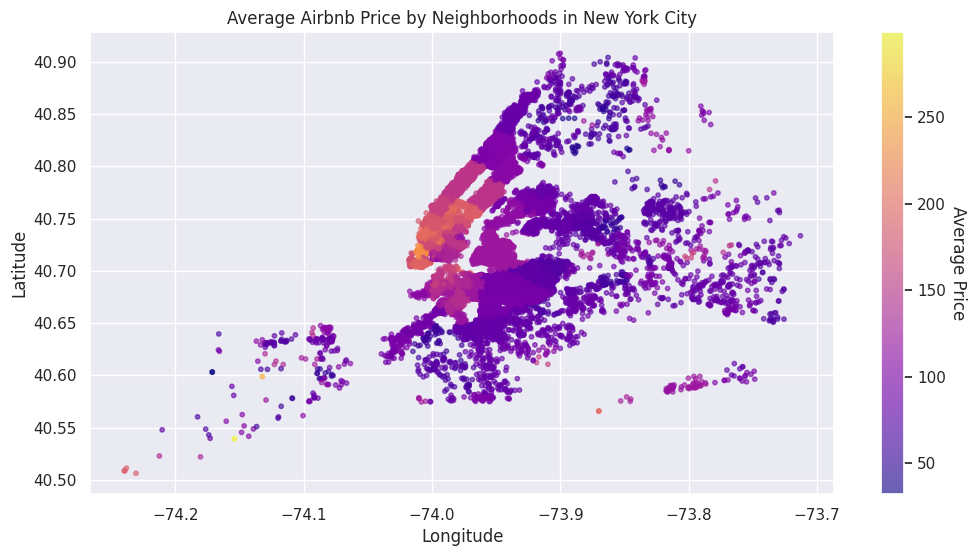

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Calculate average price per neighborhood
# -----------------------------
neighbourhood_avg_price = Airbnb_df.groupby("neighbourhood")["price"].mean().reset_index()
neighbourhood_avg_price = neighbourhood_avg_price.rename(columns={"price": "avg_price"})

# Merge the average price back to the original DataFrame
df = Airbnb_df.merge(neighbourhood_avg_price, on="neighbourhood", how="left")

# -----------------------------
# Scatter plot of Airbnb prices
# -----------------------------
fig, ax = plt.subplots(figsize=(12,6))

# Scatter plot with longitude, latitude and color representing average price
scatter = ax.scatter(df["longitude"], df["latitude"], c=df["avg_price"], cmap="plasma", alpha=0.6, s=10)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Average Price', rotation=270, labelpad=15)

# Set title and labels
ax.set_title("Average Airbnb Price by Neighborhoods in New York City")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


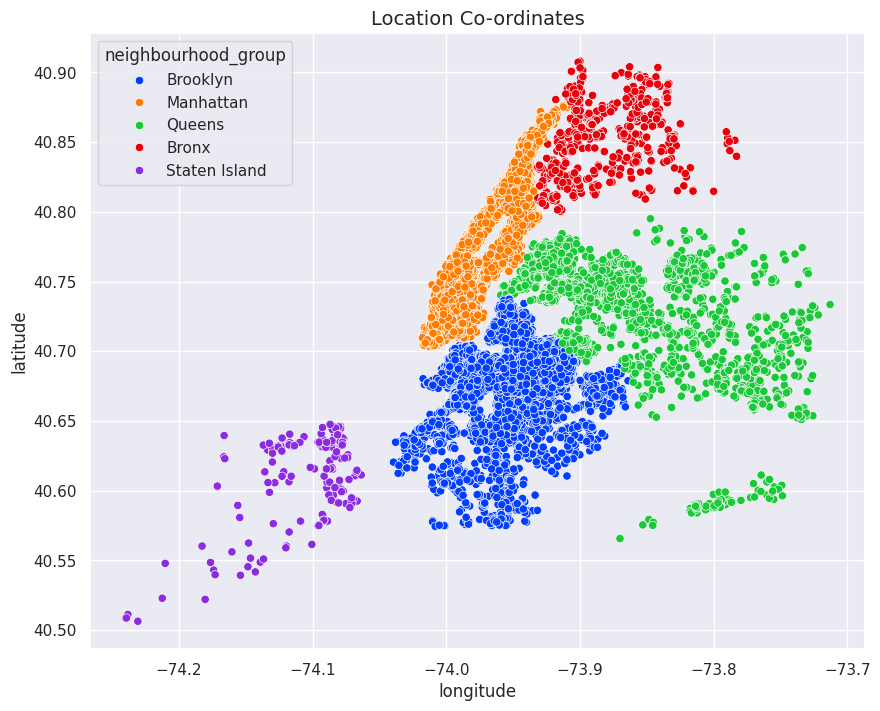

In [90]:
#trying to find where the coordinates belong from the latitude and longitude

# set the default figure size for the seaborn library
sns.set(rc={"figure.figsize": (10, 8)})

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset
ax = sns.scatterplot(data=Airbnb_df, x="longitude", y="latitude", hue='neighbourhood_group', palette='bright')

# set the title of the plot
ax.set_title('Location Co-ordinates', fontsize='14')
plt.show()

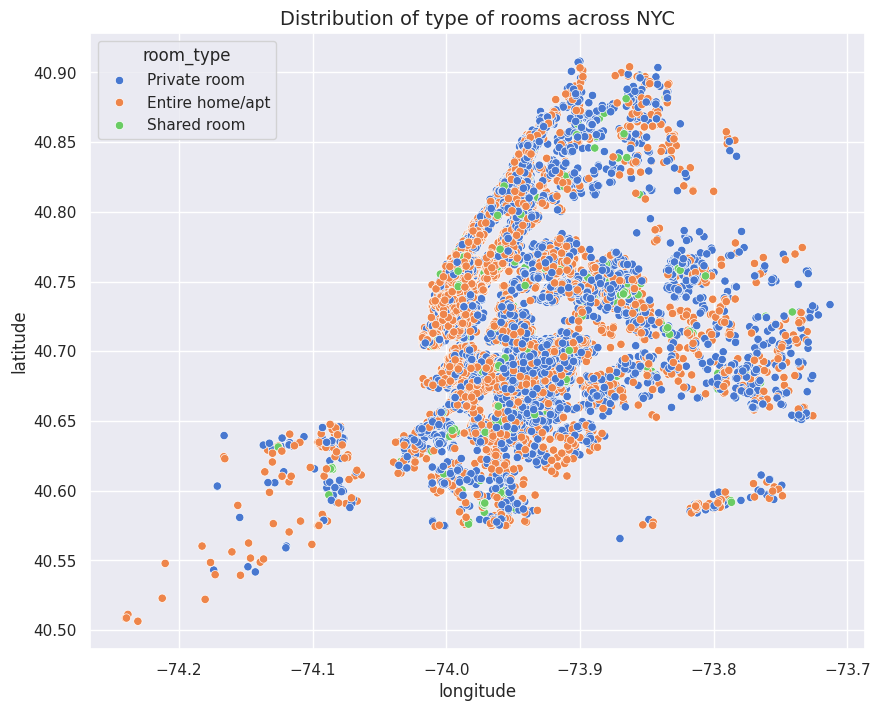

In [91]:
# Let's observe the type of room_types

# set the default figure size for the seaborn library
sns.set(rc={"figure.figsize": (10, 8)})

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset with room_types.
ax = sns.scatterplot(x=Airbnb_df.longitude, y=Airbnb_df.latitude, hue=Airbnb_df.room_type, palette='muted')

# set the title of the plot
ax.set_title('Distribution of type of rooms across NYC', fontsize='14')
plt.show()

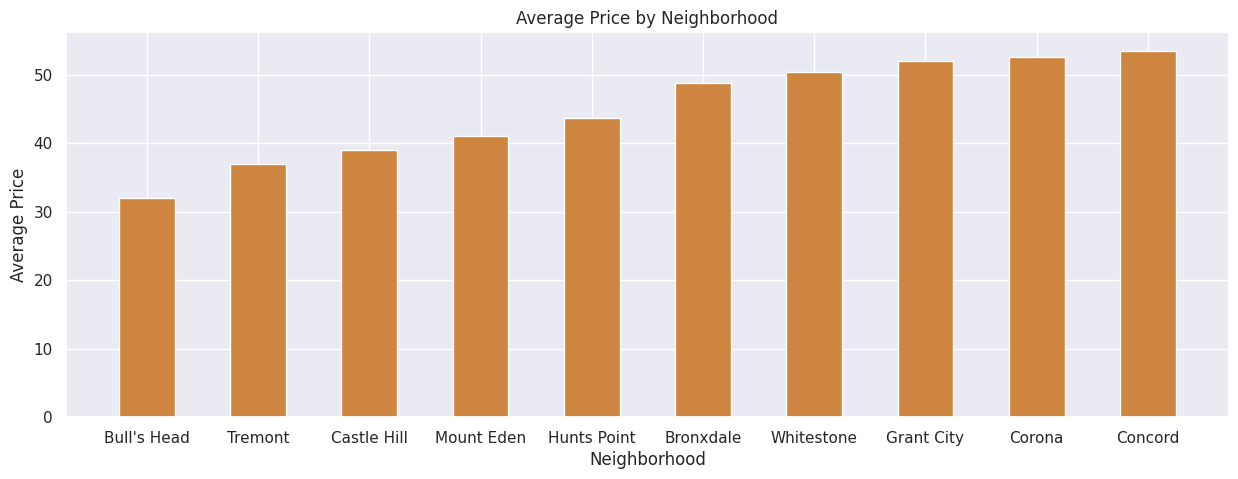

In [92]:
# Extract the values from the dataset
neighborhoods = neighbourhood_avg_price_sorted_with_group['neighbourhood']
prices = neighbourhood_avg_price_sorted_with_group['avg_price']

# Create the bar plot
plt.figure(figsize=(15,5))
plt.bar(neighborhoods, prices,width=0.5, color = 'peru')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood')

# Show the plot
plt.show()

In [93]:
# create a new DataFrame that displays the number of listings of each room type in the Airbnb NYC dataset
top_room_type = Airbnb_df['room_type'].value_counts().reset_index()

# rename the columns of the resulting DataFrame to 'Room_Type' and 'Total_counts'
top_room_type.columns = ['Room_Type', 'Total_counts']

# display the resulting DataFrame
top_room_type

Room_Type  Total_counts
0     Private room         10207
1  Entire home/apt          9981
2      Shared room           597

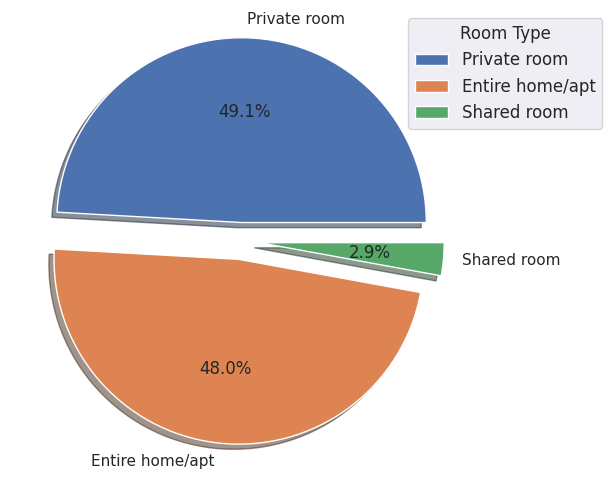

In [94]:
# Chart - 9 visualization code
# Set the figure size
plt.figure(figsize=(10, 6))

# Get the room type counts
room_type_counts = Airbnb_df['room_type'].value_counts()

# Set the labels and sizes for the pie chart
labels = room_type_counts.index
sizes = room_type_counts.values

# Create an explode list to "blast" all segments
explode = [0.1]*len(sizes)

# Create the pie chart with the explode effect and a shadow
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True)

# Add a legend to the chart
plt.legend(title='Room Type', bbox_to_anchor=(0.8, 0, 0.5, 1), fontsize='12')

# Show the plot
plt.show()

In [95]:
# Group the DataFrame by the minimum_nights column and count the number of rows in each group
min_nights_count = Airbnb_df.groupby('minimum_nights').size().reset_index(name = 'count')

# Sort the resulting DataFrame in descending order by the count column
min_nights_count = min_nights_count.sort_values('count', ascending=False)

# Select the top 10 rows
min_nights_count = min_nights_count.head(15)

# Reset the index
min_nights_count = min_nights_count.reset_index(drop=True)

# Display the resulting DataFrame
min_nights_count

minimum_nights  count
0                1   5563
1                2   5073
2                3   3335
3               30   1681
4                4   1360
5                5   1190
6                7    793
7                6    297
8               14    241
9               10    189
10              29    162
11              15    113
12              20     86
13              31     83
14              28     75

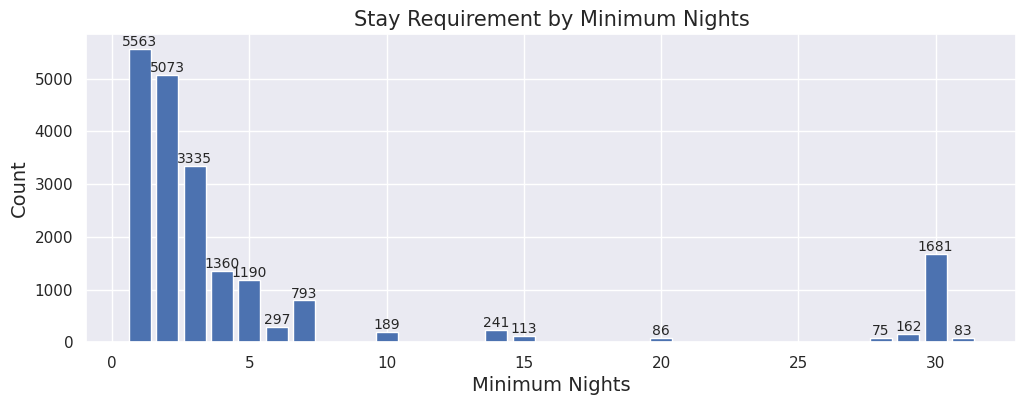

In [96]:
# Chart - 10 visualization code
# Extract the minimum_nights and count columns from the DataFrame
minimum_nights = min_nights_count['minimum_nights']
count = min_nights_count['count']

# Set the figure size
plt.figure(figsize=(12, 4))

# Create the bar plot
bars = plt.bar(minimum_nights, count)
# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Add axis labels and a title
plt.xlabel('Minimum Nights', fontsize='14')
plt.ylabel('Count', fontsize='14')
plt.title('Stay Requirement by Minimum Nights', fontsize='15')

# Show the plot
plt.show()

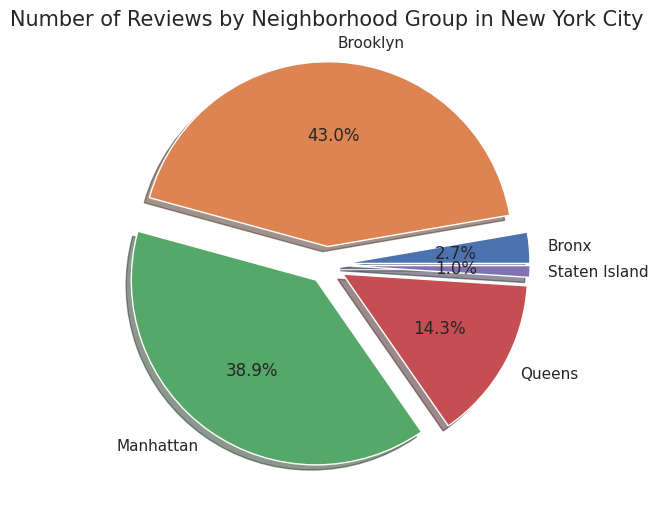

In [97]:
# Chart - 11 visualization code
# Group the data by neighborhood group and calculate the total number of reviews
plt.figure(figsize=(10, 6))
reviews_by_neighbourhood_group = Airbnb_df.groupby("neighbourhood_group")["total_reviews"].sum()

# Create an explode list to "blast" all segments
explode = [0.1]*len(reviews_by_neighbourhood_group)

# Create a pie chart with the explode effect and a shadow
plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%', explode=explode, shadow=True)

# Add a title to the chart
plt.title("Number of Reviews by Neighborhood Group in New York City", fontsize='15')

# Display the chart
plt.show()

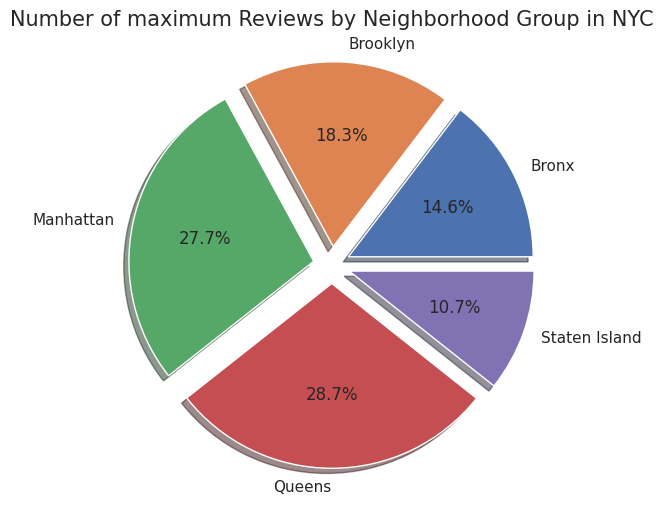

In [98]:
# Chart - 12 visualization code
# Group the Airbnb data by neighbourhood group
plt.figure(figsize=(10, 6))
reviews_by_neighbourhood_group = Airbnb_df.groupby("neighbourhood_group")["total_reviews"].max()

# Create an explode list to "blast" all segments
explode = [0.1]*len(reviews_by_neighbourhood_group)

# Create a pie chart with the explode effect and a shadow
plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%', explode=explode, shadow=True)

# Add a title to the chart
plt.title("Number of maximum Reviews by Neighborhood Group in NYC", fontsize='15')

# Display the chart
plt.show()

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

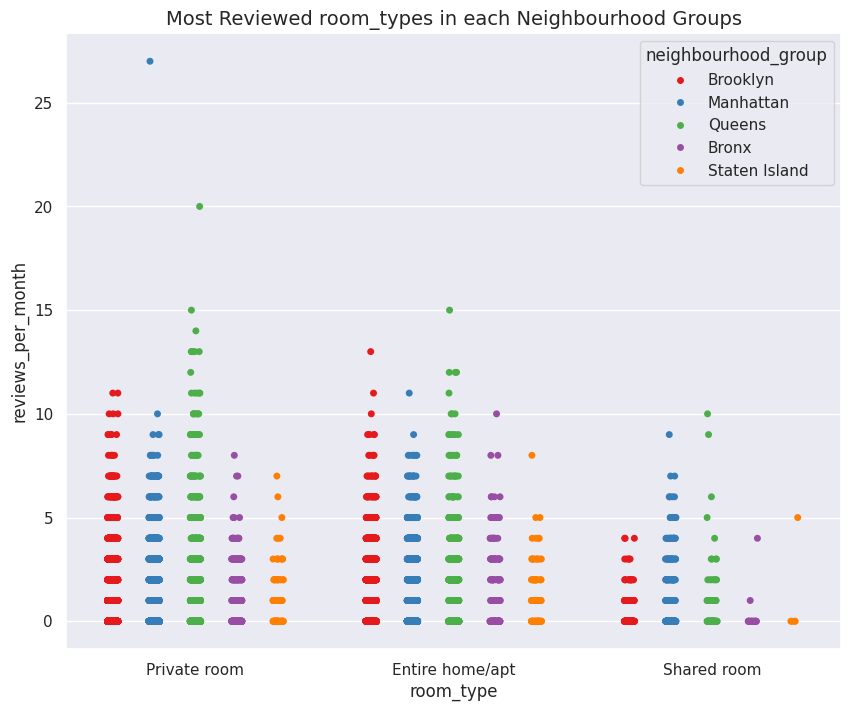

In [99]:

# Chart - 13 visualization code
# create a figure with a default size of (10, 8)
f, ax = plt.subplots(figsize=(10, 8))

# create a stripplot that displays the number of reviews per month for each room type in the Airbnb NYC dataset
ax = sns.stripplot(x='room_type', y='reviews_per_month', hue='neighbourhood_group', dodge=True, data=Airbnb_df, palette='Set1')

# set the title of the plot
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups', fontsize='14')


listing_id   host_id  latitude  longitude     price  \
listing_id             1.000000  0.593211 -0.004838   0.091370 -0.025343   
host_id                0.593211  1.000000  0.011520   0.134061 -0.025821   
latitude              -0.004838  0.011520  1.000000   0.102736  0.071447   
longitude              0.091370  0.134061  0.102736   1.000000 -0.316472   
price                 -0.025343 -0.025821  0.071447  -0.316472  1.000000   
minimum_nights        -0.022258 -0.027149  0.033188  -0.066276  0.035442   
total_reviews         -0.341279 -0.153900 -0.011084   0.056245 -0.010923   
reviews_per_month      0.199472  0.221650 -0.013069   0.139001 -0.026655   
host_listings_count    0.117428  0.126165  0.028734  -0.119672  0.204828   
availability_365       0.051500  0.163311 -0.017115   0.083683  0.084691   

                     minimum_nights  total_reviews  reviews_per_month  \
listing_id                -0.022258      -0.341279           0.199472   
host_id                   -0.027149      -0.153900           0.221650   
latitude                   0.033188      -0.011084          -0.013069   
longitude                 -0.066276       0.056245           0.139001   
price                      0.035442      -0.010923          -0.026655   
minimum_nights             1.000000      -0.094066          -0.128826   
total_reviews             -0.094066       1.000000           0.558960   
reviews_per_month         -0.128826       0.558960           1.000000   
host_listings_count        0.153463      -0.084759          -0.062251   
availability_365           0.137223       0.167293           0.136616   

                     host_listings_count  availability_365  
listing_id                      0.117428          0.051500  
host_id                         0.126165          0.163311  
latitude                        0.028734         -0.017115  
longitude                      -0.119672          0.083683  
price                           0.204828          0.084691  
minimum_nights                  0.153463          0.137223  
total_reviews                  -0.084759          0.167293  
reviews_per_month              -0.062251          0.136616  
host_listings_count             1.000000          0.232504  
availability_365                0.232504          1.000000

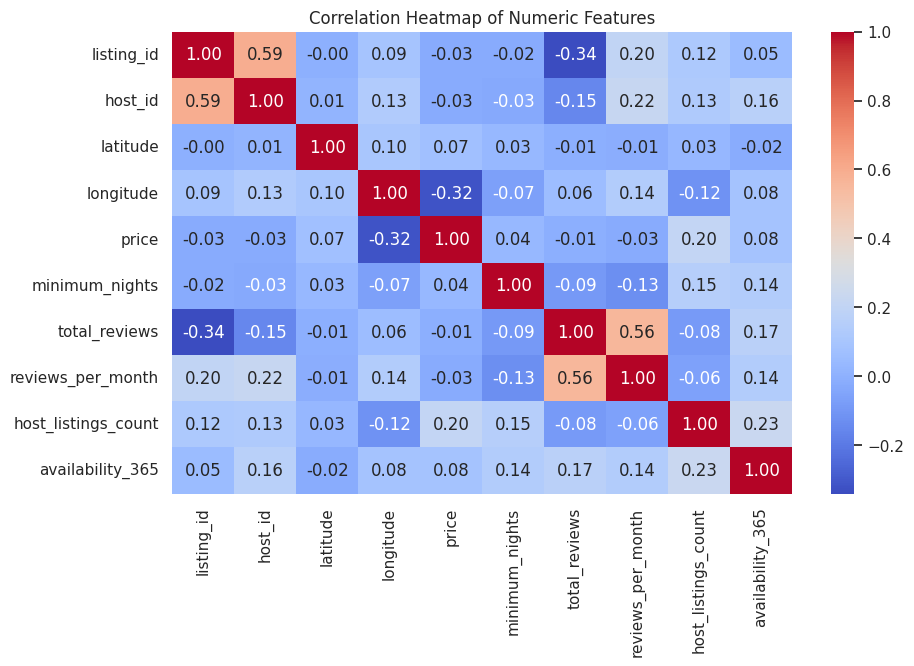

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = Airbnb_df.select_dtypes(include=['float64', 'int64'])

# Calculate pairwise correlations
corr = numeric_df.corr()

# Display the correlation matrix
display(corr)

# Optional: visualize correlation as heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


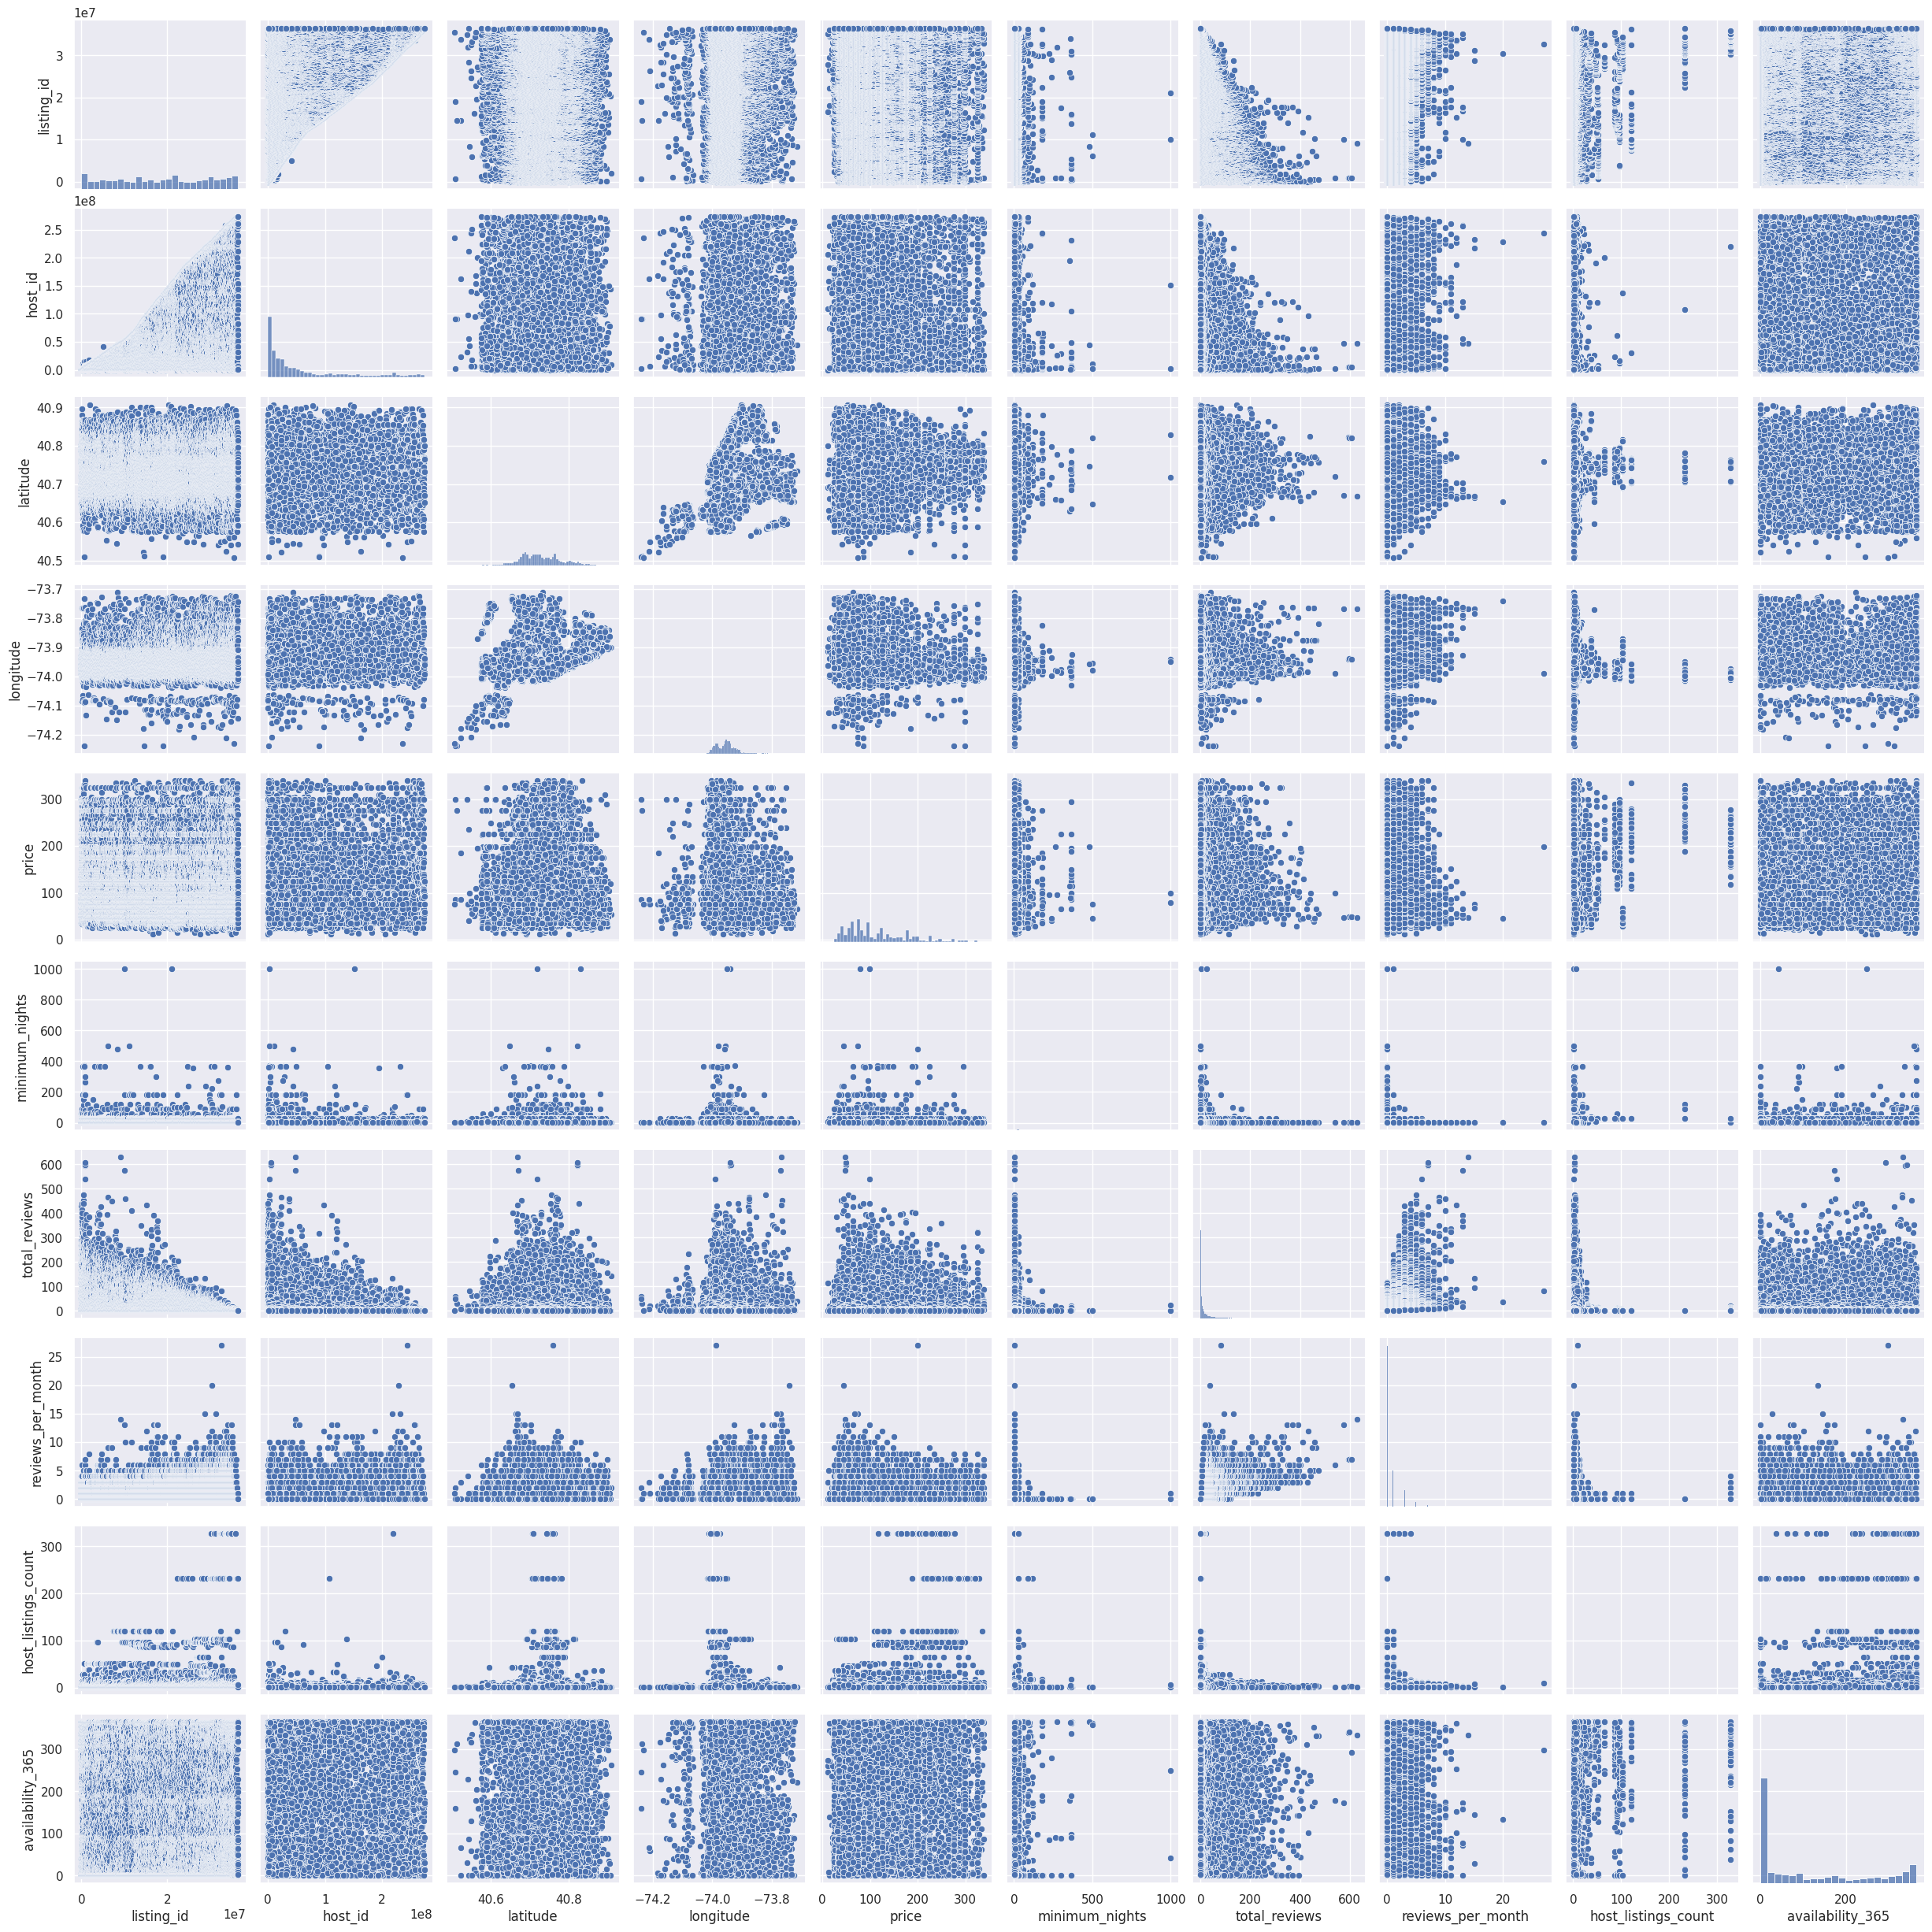

In [102]:
# Pair Plot visualization code
# create a pairplot using the seaborn library to visualize the relationships between different variables in the Airbnb NYC dataset
sns.pairplot(Airbnb_df)

# show the plot
plt.show()